In [1]:
import numpy
import pandas
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from davitpy import utils
from davitpy import gme
import aacgmv2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
inpDir = "../data/"
coords = "mlt"
inpGlatFile = None
inpGlonFile = None
inpTime = datetime.datetime(2014,12,14,22)

In [3]:
def convert_aacgm_geo(row, a2g=False):
    """
    Convert glat, glon values 
    into aacgm coords : MLAT, MLON
    and MLT.
    """
    for col in row.keys():
        if col.isdigit():
            currDate = datetime.datetime.strptime(\
                            col, "%Y%m%d%H%M%S" )
            mlat, mlon = aacgmv2.convert(row["glat"],\
                        row["glon"],\
                        300, currDate)
            mlt = aacgmv2.convert_mlt(mlon,\
                            currDate, m2a=False)
            row["mlat"] = numpy.round( mlat, 2)
            row["mlon"] = numpy.round( mlon, 2)
            row["mlt_" + col] = numpy.round( mlt, 2)
    return row

In [4]:
# Loop through the directory and get
# the required pixel value files
asiDict = {}
for pFn in os.listdir(inpDir):
    if os.path.isfile(inpDir + pFn):
        # check if the file is a pixel file
        # or a glat/glon file or some random
        # file which we don't need
        if "glat" in pFn:
            if inpGlatFile is None:
                asiDict["glat"] = numpy.loadtxt(inpDir + pFn).ravel()
        elif "glon" in pFn:
            if inpGlonFile is None:
                asiDict["glon"] = numpy.loadtxt(inpDir + pFn).ravel()
        else:
            fNameList = pFn.split("_")
            # Now check if the first element
            # is a digit (date)!
            if fNameList[0].isdigit():
                # Now get the date of the image
                fDate = datetime.datetime.strptime(\
                            fNameList[0], "%Y%m%d%H%M%S" )
                currPixels = numpy.loadtxt(inpDir + pFn).ravel()
                asiDict[fNameList[0]] = currPixels
asiDF = pandas.DataFrame.from_dict(asiDict)
asiDF = asiDF.apply(convert_aacgm_geo, axis=1) 

In [5]:
asiDF.head(100)

,20141214220035,20141214220235,glat,glon,mlat,mlon,mlt_20141214220035,mlt_20141214220235
0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
3,128.600,0.000,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
5,5609.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
7,2520.000,7535.000,NaN,NaN,NaN,NaN,NaN,NaN
8,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
9,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


ValueError: cannot reshape array of size 41418 into shape (203,204)

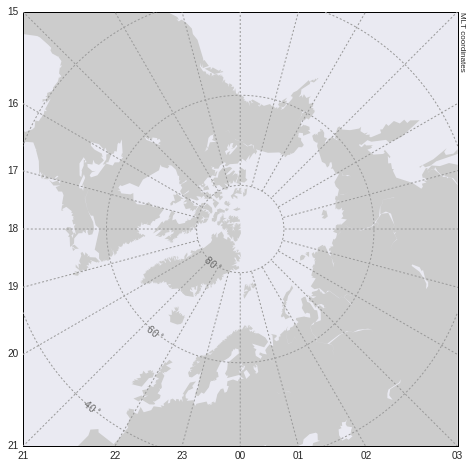

In [70]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords,\
                           lat_0=90., lon_0=0, datetime=inpTime)
# choose lats & lons based on input coords
selAsiDF = asiDF.dropna()
if coords == "geo":
    asiLats = selAsiDF["glat"].values
    asiLons = selAsiDF["glon"].values
else:
    asiLats = selAsiDF["mlat"].values
    if coords == "mag":
        asiLons = selAsiDF["mlon"].values
    else:
        asiLons = selAsiDF["mlt_20141214220035"].values*15.
# choose pixel values
# There is a broad range of values
# so we'll use a logarighmic scale
asiPix = numpy.log( selAsiDF["20141214220035"].values )
xVecs, yVecs = m(asiLons, asiLats,\
                         coords=coords)
# ssusiPlot = m.scatter(xVecs, yVecs, c=asiPix, s=30.,\
#                        cmap="Greens", alpha=0.5, zorder=7, \
#                                  edgecolor='none', marker="s",\
#                                   vmin=0, vmax=11.)


ssusiPlot = m.pcolor(xVecs.reshape(203,204), yVecs.reshape(203,204), asiPix.reshape(203,204),\
                       cmap="Greens", alpha=0.5, zorder=7, \
                                 edgecolor='none',\
                                  vmin=0, vmax=11.)
ssusiPlot.set_rasterized(True)
cbar = plt.colorbar(ssusiPlot, orientation='vertical')

In [73]:
glats = numpy.loadtxt("../data/glat.dat")
glons = numpy.loadtxt("../data/glon.dat")
pix = numpy.log( numpy.loadtxt("../data/20141214220035_detrend.dat") )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


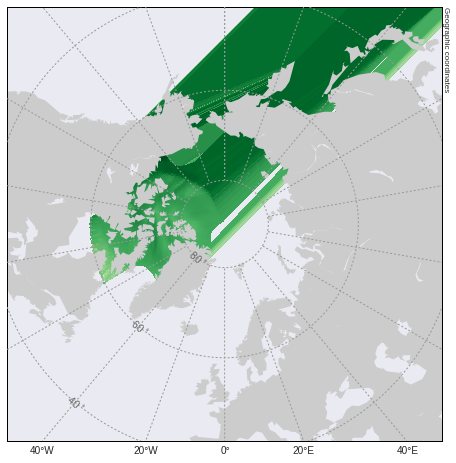

In [86]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords="geo",\
                           lat_0=90., lon_0=0)
glatsM = numpy.ma.masked_where(numpy.isnan(glats),glats)
glonsM = numpy.ma.masked_where(numpy.isnan(glons),glons)
xVecs, yVecs = m(glonsM, glatsM, coords="geo")
pixM = numpy.ma.masked_where(numpy.isinf(pix),pix)
ssusiPlot = m.pcolormesh(xVecs, yVecs, pixM, cmap='Greens')

In [88]:
print glonsM[0]

[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- 296.3 296.2 296.1 296.0 295.9
 295.8 295.8 295.7 295.6 295.5 295.4 295.4 295.3 295.2 295.2 295.1 295.1
 295.0 295.0 295.0 294.9 294.9 294.9 294.9 294.9 294.9 294.9 294.9 294.9
 294.9 295.0 295.0 295.1 295.1 295.2 295.3 295.4 295.4 295.5 295.6 295.7
 295.9 296.0 296.1 296.2 296.4 296.5 296.7 296.9 297.1 297.3 297.5 297.7
 297.9 298.2 298.5 298.7 299.0 299.3 299.5 299.9 300.2 300.5 301.0 301.3
 301.7 302.1 302.5 302.9 303.5 303.9 304.3 304.9 305.4 305.9 306.2 307.1
 307.3 308.0 308.5 309.0 309.8 310.5 311.2 311.8 312.6 313.4 314.3 315.1
 315.9 316.9 317.7 318.7 319.6 320.5 321.6 322.5 323.7 324.7 -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- --]


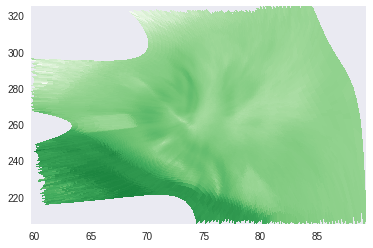

In [80]:
plt.pcolor(glatsM, glonsM, pixM, cmap='Greens', vmin=0., vmax=12.)